In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_openml
credit_data = fetch_openml(name='Credit-Risk-Dataset', version=1)
df = credit_data['data']
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,123.0,PERSONAL,D,35000.0,16.02,1.0,0.59,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1.0,0.57,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,35000.0,15.23,1.0,0.53,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,35000.0,14.27,1.0,0.55,Y,4.0


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.dtypes

person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_status                   float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object

In [ ]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [ ]:
df.isna().sum()/df.shape[0]*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

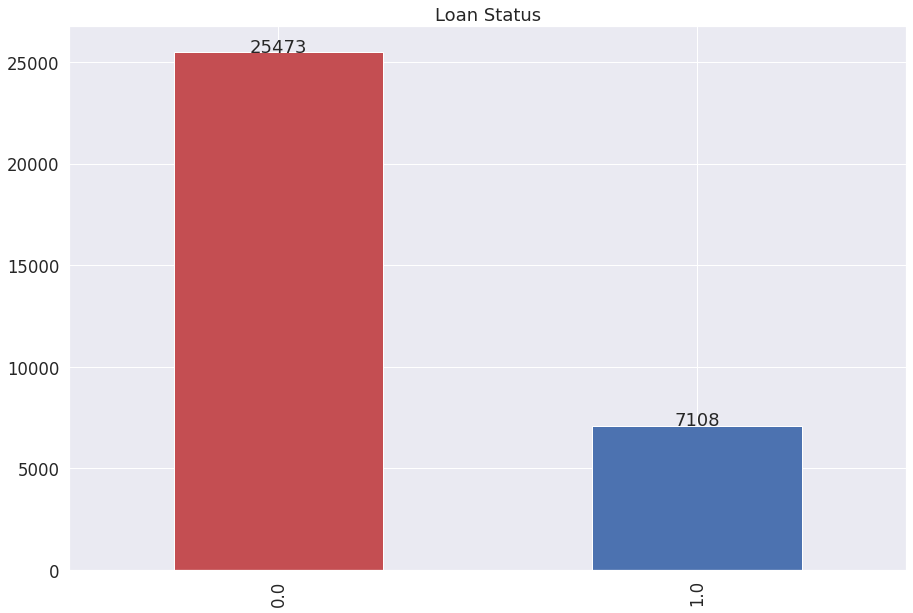

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
df['loan_status'].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Loan Status")
df['loan_status'].value_counts()
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
addlabels(df['loan_status'].value_counts().index, df['loan_status'].value_counts().values)

In [ ]:
!pip install optbinning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
col = 'loan_amnt'
optb = optbinning.OptimalBinning(dtype='numerical')
optb.fit(df[col], df['loan_status'])
binning_table = optb.binning_table
display(binning_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3262.50)",4266,0.130935,3341,925,0.216831,0.007834,8.017028e-06,1.002126e-06
1,"[3262.50, 4787.50)",2727,0.083699,2177,550,0.201687,0.099387,8.035843e-04,1.004067e-04
2,"[4787.50, 5062.50)",2511,0.077069,2042,469,0.186778,0.194684,2.760877e-03,3.445656e-04
3,"[5062.50, 6087.50)",2710,0.083177,2301,409,0.150923,0.450986,1.478789e-02,1.832978e-03
4,"[6087.50, 7387.50)",2340,0.071821,1960,380,0.162393,0.36413,8.550992e-03,1.063008e-03
5,"[7387.50, 8262.50)",2310,0.070900,1877,433,0.187446,0.190294,2.429787e-03,3.032660e-04
6,"[8262.50, 10587.50)",4893,0.150180,3920,973,0.198856,0.117065,1.990149e-03,2.486266e-04
7,"[10587.50, 14487.50)",4251,0.130475,3324,927,0.218066,0.000572,4.274703e-08,5.343379e-09
8,"[14487.50, 18087.50)",3140,0.096375,2285,855,0.272293,-0.293378,8.972735e-03,1.117587e-03
9,"[18087.50, 22150.00)",1658,0.050889,1120,538,0.324487,-0.543173,1.723011e-02,2.127672e-03


In [ ]:
col = 'loan_intent'
optb = optbinning.OptimalBinning(dtype='categorical')
optb.fit(df[col], df['loan_status'])
binning_table = optb.binning_table
display(binning_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[VENTURE],5719,0.175532,4872,847,0.148103,0.473161,0.034115,0.004225
1,[EDUCATION],6453,0.198060,5342,1111,0.172168,0.293941,0.015699,0.001955
2,[PERSONAL],5521,0.169455,4423,1098,0.198877,0.11693,0.002240,0.000280
3,[HOMEIMPROVEMENT],3605,0.110647,2664,941,0.261026,-0.235757,0.006555,0.000818
4,[MEDICAL],6071,0.186336,4450,1621,0.267007,-0.266537,0.014222,0.001772
5,[DEBTCONSOLIDATION],5212,0.159971,3722,1490,0.285879,-0.360913,0.022921,0.002850
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,32581,1.000000,25473,7108,0.218164,,0.095752,0.011900


Feature Name :  person_age


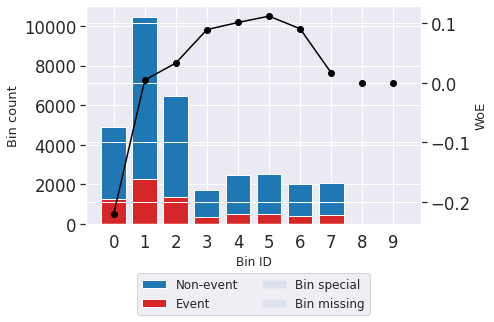

None

Feature Name :  person_income


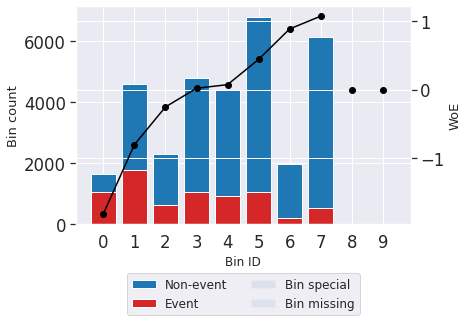

None

Feature Name :  person_home_ownership


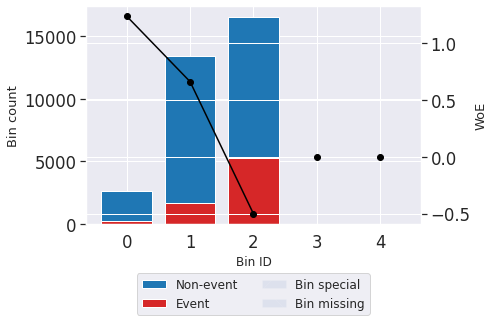

None

Feature Name :  person_emp_length


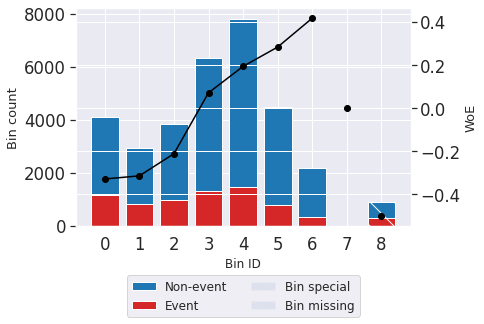

None

Feature Name :  loan_intent


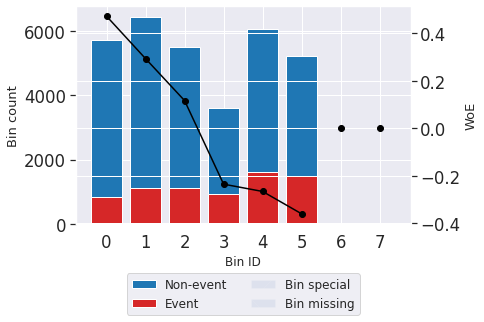

None

Feature Name :  loan_grade


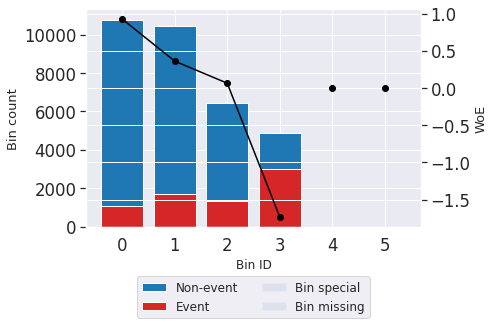

None

Feature Name :  loan_amnt


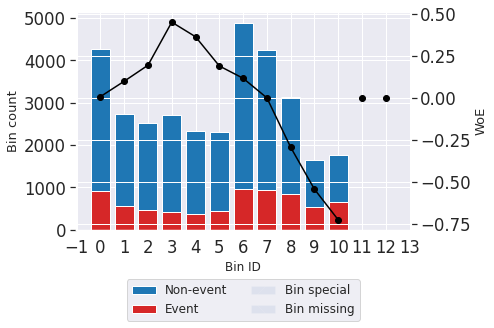

None

Feature Name :  loan_int_rate


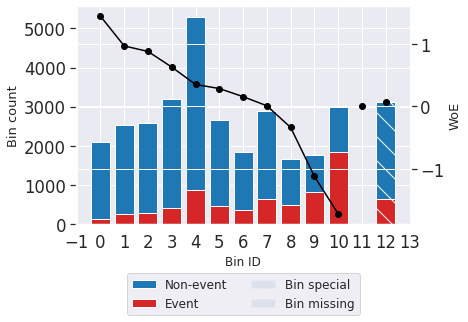

None

Feature Name :  loan_percent_income


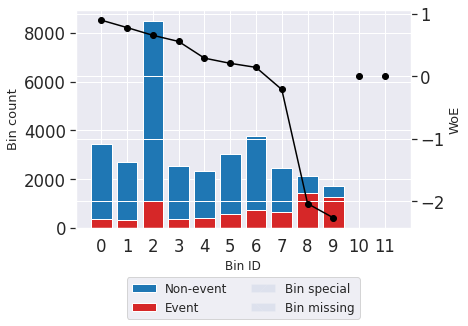

None

Feature Name :  cb_person_default_on_file


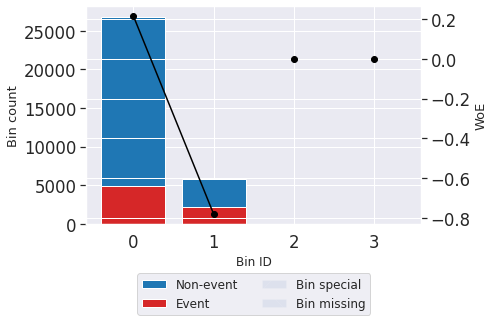

None

Feature Name :  cb_person_cred_hist_length


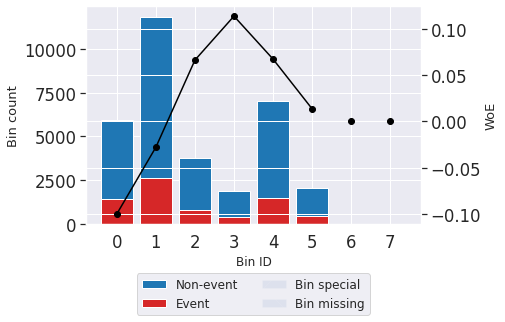

None

In [ ]:
import optbinning

df_categorical = list(df.drop('loan_status',axis=1).select_dtypes(include='object').columns) 
df_numerical = list(df.drop('loan_status',axis=1).select_dtypes(include=['int64','float64']).columns)

for col in df.drop('loan_status',axis=1).columns:
  if col in df_numerical:
    opt_bins = optbinning.OptimalBinning(dtype='numerical')
    opt_bins.fit(df[col], df['loan_status'])
  elif col in df_categorical: 
    opt_bins = optbinning.OptimalBinning(dtype='categorical')
    opt_bins.fit(df[col], df['loan_status'])
  table = opt_bins.binning_table
  table.build()
  print("Feature Name : ", col)
  display(table.plot(metric="woe"))

In [ ]:
cols = list(df.drop('loan_status',axis=1).columns)
X = df[cols].values
y = df.loan_status.values
y = y.astype(int)

In [ ]:
binning_fit_params = {
    "person_age": {"monotonic_trend": "ascending"},
    "person_income": {"monotonic_trend": "ascending"},
    "person_emp_length": {"monotonic_trend": "ascending"},
    "loan_amnt": {"monotonic_trend": "descending"},
    "loan_int_rate": {"monotonic_trend": "descending"},
    "loan_percent_income": {"monotonic_trend": "descending"},
    "cb_person_cred_hist_length": {"monotonic_trend": "ascending"}
}

In [ ]:
binning_process = optbinning.BinningProcess(cols, 
                                            categorical_variables = df_categorical, 
                                            binning_fit_params=binning_fit_params)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps=[('binning_process', binning_process),
                      ('classifier', LogisticRegression(solver="lbfgs"))])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('binning_process',
                 BinningProcess(binning_fit_params={'cb_person_cred_hist_length': {'monotonic_trend': 'ascending'},
                                                    'loan_amnt': {'monotonic_trend': 'descending'},
                                                    'loan_int_rate': {'monotonic_trend': 'descending'},
                                                    'loan_percent_income': {'monotonic_trend': 'descending'},
                                                    'person_age': {'monotonic_trend': 'ascending'},
                                                    'person_emp_length': {'mon...
                                categorical_variables=['person_home_ownership',
                                                       'loan_intent',
                                                       'loan_grade',
                                                       'cb_person_default_on_file'],
                                variable_names=[

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5072
           1       0.81      0.66      0.73      1445

    accuracy                           0.89      6517
   macro avg       0.86      0.81      0.83      6517
weighted avg       0.89      0.89      0.89      6517



In [ ]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

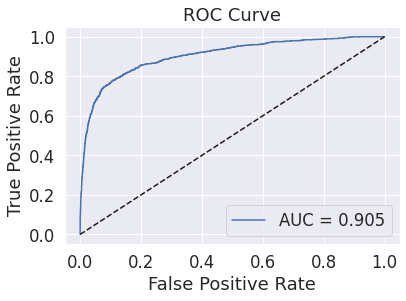

In [ ]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = {0:.3f}'.format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()